### Importing fundamental frameworks

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing sklearn units

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
TRAIN_DATA_PATH = "/kaggle/input/human-activity-recognition-with-smartphones/train.csv"
TEST_DATA_PATH = "/kaggle/input/human-activity-recognition-with-smartphones/test.csv"

In [4]:
df_train = pd.read_csv(TRAIN_DATA_PATH)
df_test = pd.read_csv(TEST_DATA_PATH)

In [5]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
"angle(X,gravityMean)",7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
"angle(Y,gravityMean)",7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157
"angle(Z,gravityMean)",7352.0,-0.056515,0.279122,-1.000000,-0.143414,0.003181,0.107659,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
df_train.shape

(7352, 563)

After these observations we can say that our target is Activity column because we'd like to understand during what condution the person has which activity.

Checking missing values.

In [9]:
df_train.isna().any().any()

False

In [10]:
df_test.isna().any().any()

False

 There is no missing value in both datasets train and test.

In [11]:
df_test.duplicated().any()

False

In [12]:
df_train.duplicated().any()

False

There is no duplicates

In [13]:
df_test.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [14]:
pd.crosstab(index = df_train["Activity"],columns="count")

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


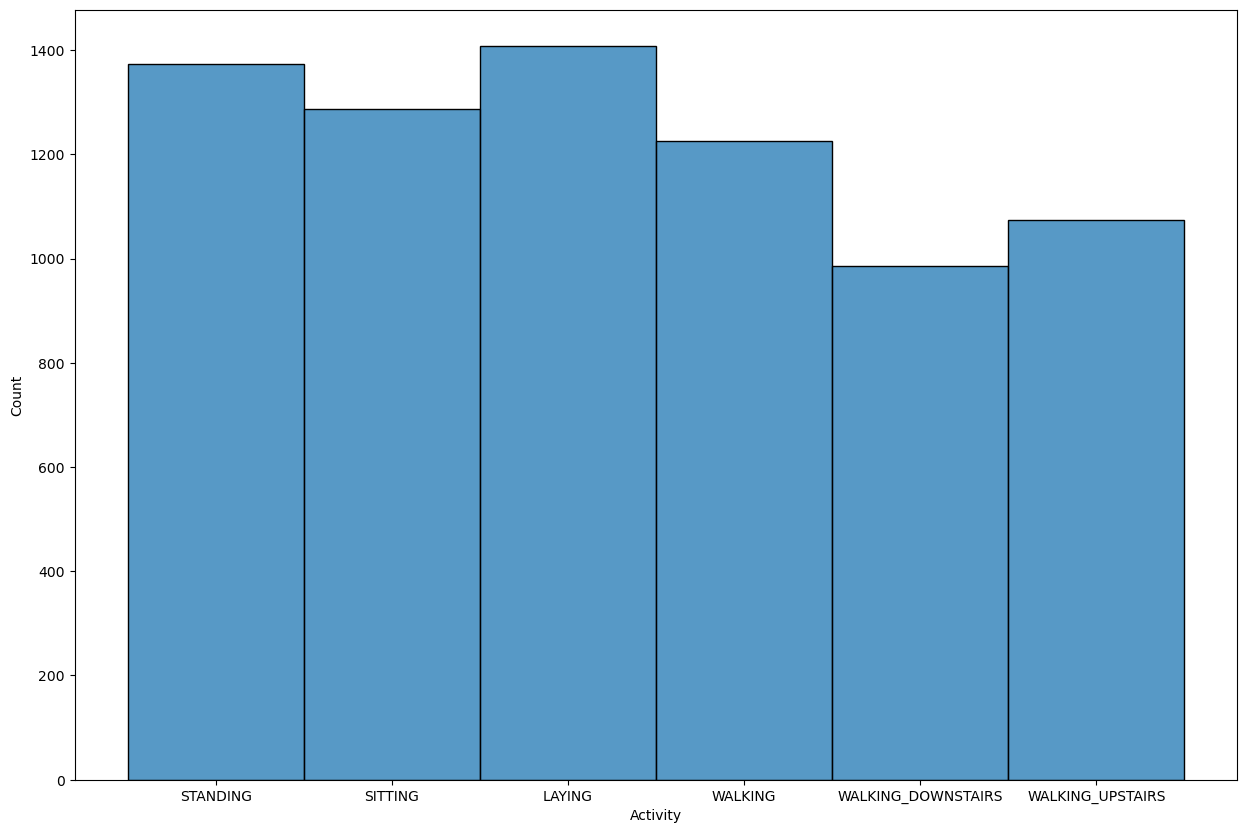

In [15]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data= df_train, x="Activity")
plt.show()

Data is distributed well.

In [16]:
df_train.subject.unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

It seems the column subject doesn't look useful and meaningful, that's why we will drop that column.

In [17]:
X = df_train.drop(['Activity','subject'],axis=1)
y = df_train.Activity.values.astype(object)

In [18]:
print(f"X shape {X.shape}")
print(f"y shape {y.shape}")

X shape (7352, 561)
y shape (7352,)


In [19]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [22]:
y_encoded[2]

2

## Scaling

In [23]:
scaler = StandardScaler()

In [24]:
X = scaler.fit_transform(X)

We have done basic EDA, encoding and scaling. Now we have to divide our data to make ready for our model. (Train and test)

## Model building

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [26]:
rfc = RandomForestClassifier(max_depth=4, random_state=42)

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [28]:
y_pred= rfc.predict(X_test)

We don't need to import accuracy_score from sklearn.metrics because RFC already has score function to calculate accuracy score.

## Validation

In [29]:
print(f"Accuracy: {rfc.score(X_test, y_test)}")

Accuracy: 0.914777878513146


In [31]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv = cross_val_score(rfc, X_train, y_train, cv= kf)
print(cv)

[0.90776699 0.9271137  0.91836735 0.89795918 0.90379009]


## Model Report

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"Confussion matrix:\n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Confussion matrix:
 [[427   1   0   0   0   0]
 [  0 310  76   0   0   0]
 [  0  18 393   0   0   0]
 [  0   0   0 348   3  15]
 [  0   0   0  25 255  31]
 [  0   0   0  13   6 285]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       0.94      0.80      0.87       386
           2       0.84      0.96      0.89       411
           3       0.90      0.95      0.93       366
           4       0.97      0.82      0.89       311
           5       0.86      0.94      0.90       304

    accuracy                           0.91      2206
   macro avg       0.92      0.91      0.91      2206
weighted avg       0.92      0.91      0.91      2206



## Plot

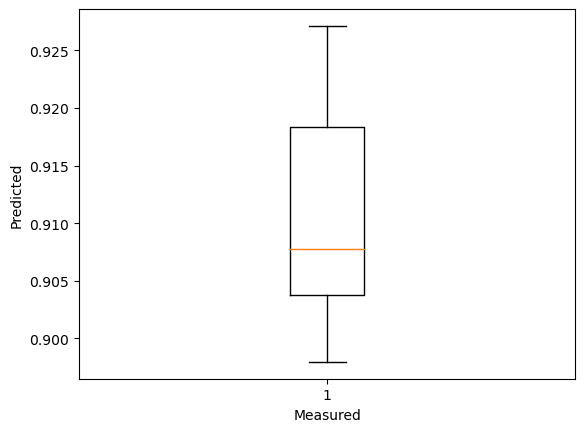

In [61]:
fig, ax = plt.subplots()
ax.boxplot(cv)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()